<a href="https://colab.research.google.com/github/shin-ta/Python-study/blob/main/CIFAR10_%E8%BB%A2%E7%A7%BB%E5%AD%A6%E7%BF%92%E3%83%BB%E3%83%95%E3%82%A1%E3%82%A4%E3%83%B3%E3%83%81%E3%83%A5%E3%83%BC%E3%83%8B%E3%83%B3%E3%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [12]:
cifar10 = tf.keras.datasets.cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [13]:
X_train.shape

(50000, 32, 32, 3)

In [14]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', ' truck']

In [15]:
# X_train = X_train / 255.0
# X_test = X_test / 255.0

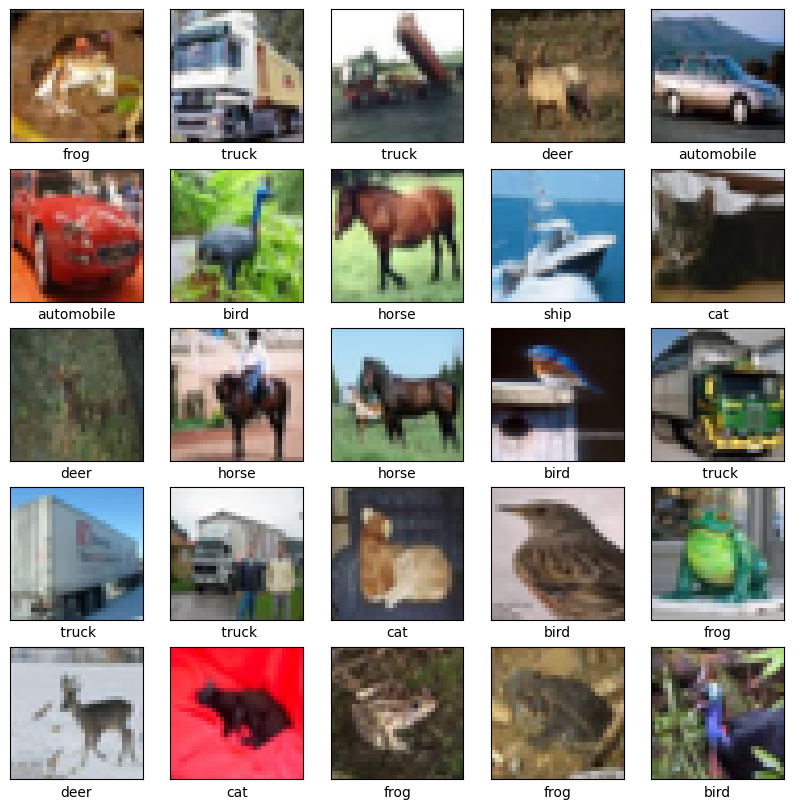

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [17]:
# ラベルデータをONE-HOTエンコードする
# y_train = tf.keras.utils.to_categorical(y_train)
# y_test = tf.keras.utils.to_categorical(y_test)

In [18]:
num_classes = 10
input_shape = (32,32,3)

# Efficientnet
base_input_shape = (224,224,3)
model_class = tf.keras.applications.EfficientNetB0

# MobileNetV2
# base_input_shape = (160,160,3)
# model_class = tf.keras.applications.MobileNetV2

inputs = tf.keras.layers.Input(shape=input_shape)
#Resize
x = tf.keras.layers.Lambda(
    lambda image: tf.image.resize(image, base_input_shape[0:2]),
    output_shape=base_input_shape)(inputs)

#学習済みモデルの組み込み
base_model = model_class(
    include_top=False,
    input_shape=base_input_shape,
    weights='imagenet')

base_model.trainable = False

# trainingをFalseにする
x = base_model(x, training=False)

#トップレイヤーの追加
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(num_classes)(x)
outputs = tf.keras.layers.Activation('softmax')(x)

model = tf.keras.Model(inputs, outputs)

In [19]:
model.compile(optimizer='sgd',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [20]:
history = model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=3,
    verbose=1,
    validation_split=0.1)

Epoch 1/3
352/352 [==============================] - 92s 244ms/step - loss: 1.2067 - accuracy: 0.6334 - val_loss: 0.6817 - val_accuracy: 0.8242
Epoch 2/3
352/352 [==============================] - 82s 234ms/step - loss: 0.6884 - accuracy: 0.7936 - val_loss: 0.5367 - val_accuracy: 0.8426
Epoch 3/3
352/352 [==============================] - 82s 234ms/step - loss: 0.5868 - accuracy: 0.8150 - val_loss: 0.4791 - val_accuracy: 0.8528


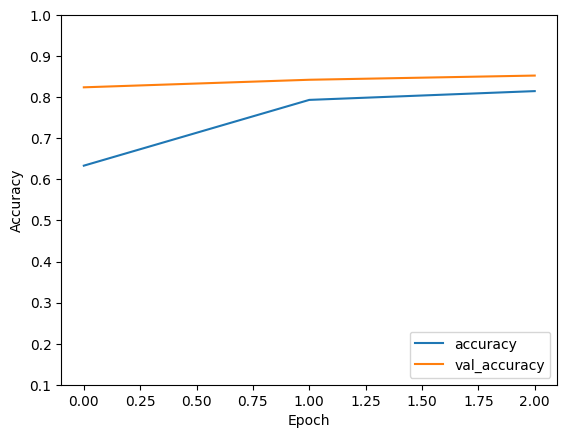

In [21]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

In [22]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 20s - loss: 0.4969 - accuracy: 0.8523 - 20s/epoch - 62ms/step

Test accuracy: 0.8522999882698059


In [23]:
base_model.trainable = True

In [24]:
model.compile(optimizer='sgd',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [25]:
history = model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=3,
    verbose=1,
    validation_split=0.1)

Epoch 1/3
352/352 [==============================] - 352s 921ms/step - loss: 0.2754 - accuracy: 0.9101 - val_loss: 0.1752 - val_accuracy: 0.9398
Epoch 2/3
352/352 [==============================] - 316s 899ms/step - loss: 0.1744 - accuracy: 0.9411 - val_loss: 0.1388 - val_accuracy: 0.9514
Epoch 3/3
352/352 [==============================] - 319s 907ms/step - loss: 0.1349 - accuracy: 0.9548 - val_loss: 0.1286 - val_accuracy: 0.9564


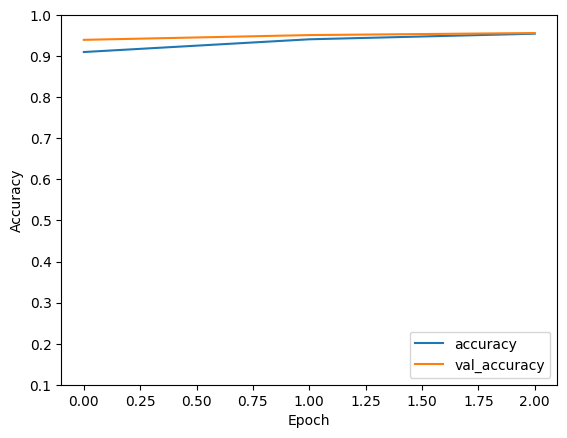

In [26]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

In [27]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 17s - loss: 0.1375 - accuracy: 0.9526 - 17s/epoch - 53ms/step

Test accuracy: 0.9526000022888184


In [31]:
predictions = model.predict(X_test)

313/313 [==============================] - 18s 53ms/step


In [32]:
predictions[0]

array([2.3273267e-05, 5.6526464e-05, 1.4133226e-04, 9.8970515e-01,
       3.7786511e-05, 7.9421196e-03, 1.9401809e-03, 2.5547841e-05,
       7.6255907e-05, 5.1929062e-05], dtype=float32)

In [33]:
np.argmax(predictions[0])

3

In [35]:
y_test[0][0]

3

In [36]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i][0]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

TypeError: only integer scalar arrays can be converted to a scalar index

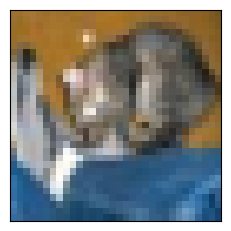

In [39]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

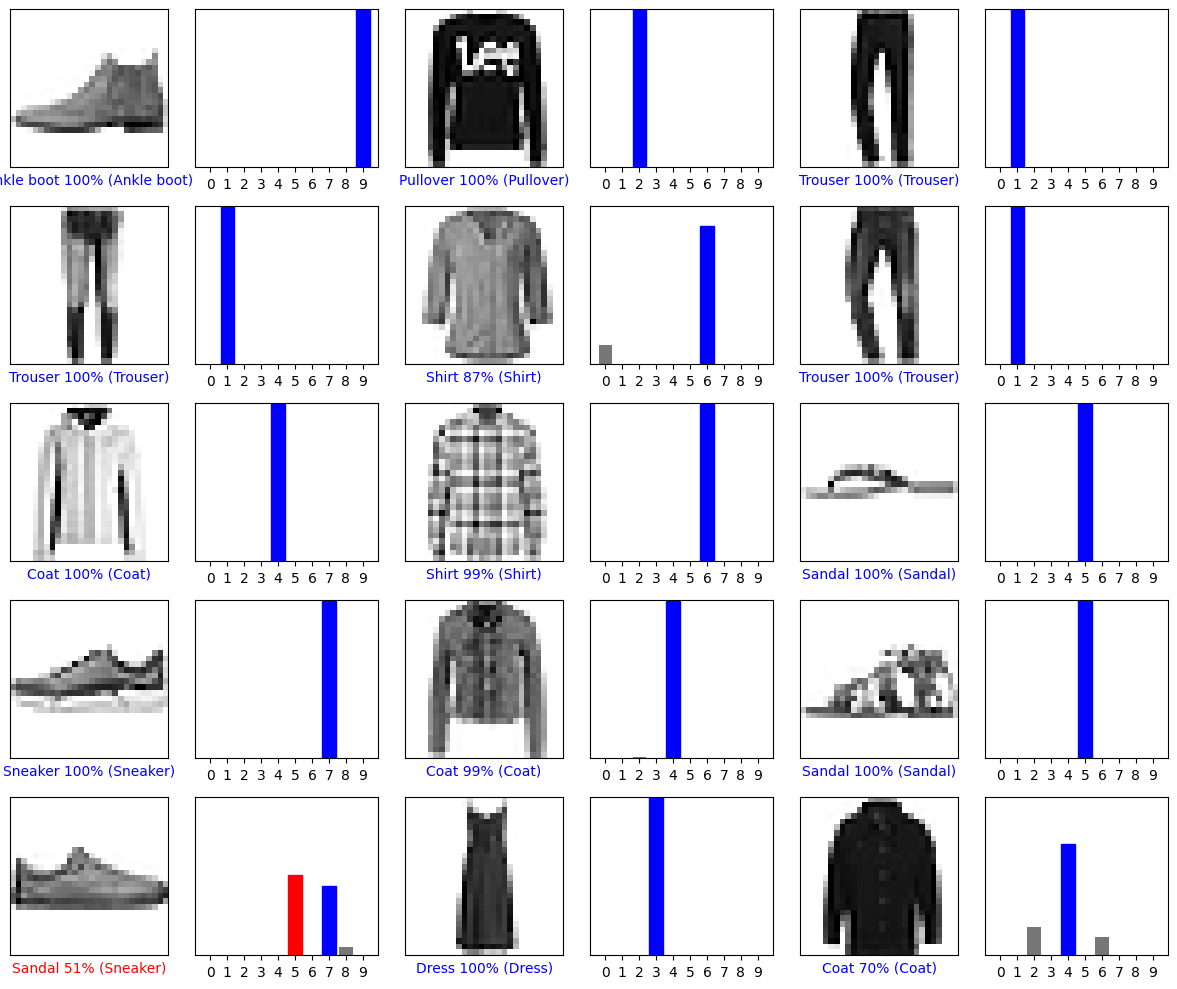

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

In [ ]:
# Grab an image from the test dataset.
img = X_test[1]

print(img.shape)

(28, 28, 1)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28, 1)


In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 196ms/step
[[6.47540901e-07 4.20024605e-12 9.99772131e-01 1.50888066e-08
  6.33234158e-05 1.38379837e-11 1.63992067e-04 1.12260956e-13
  1.37659706e-09 1.92696178e-10]]


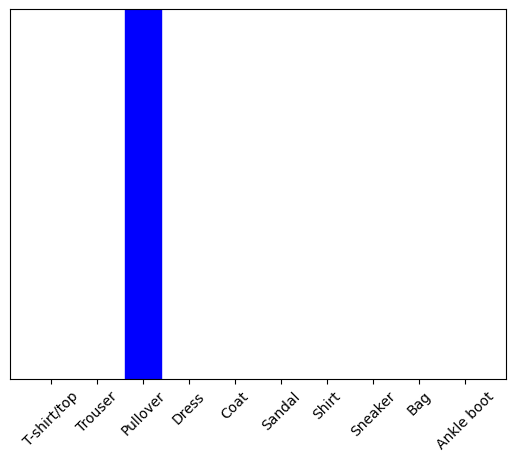

In [ ]:
plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
np.argmax(predictions_single[0])

2